# Analyzing the scraped data
When scraping data from the internet, we often need to do some "sanity checks" to make sure that the collected data is what we expect it to be, because in scraping we are exposed to connection problems, bans from the host, and errors caused by the differences between the HTML structures of different web pages.

In this notebook, you are asked to plot some graphs to explore the data that you have collected and find the problems in it, if any.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 1. Exploring the downloaded HTML files

### Task 1.1
In this task, you have to plot the distribution of the file sizes of the HTML pages that you have downloaded. Usually, all pages will have a similar size. If you notice that you have a number of files with a significantly different size than the majority of the files, then it may be a good idea to check these files and explore the reason behind this difference. For example, in our code we are saving empty HTML files if we face an error while downloading the web pages. Therefore, seeing a number of files with size zero in the histogram indicates that we have some HTML pages that were not downloaded.

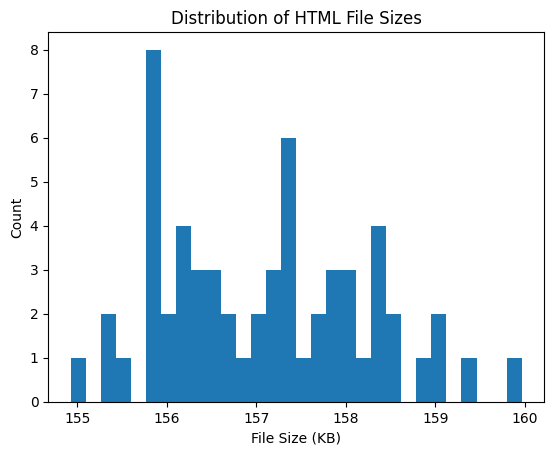

In [2]:
# Plot the distribution of the downloaded HTML file sizes
# WRITE YOUR CODE HERE
import os
# Define the path to the directory containing the downloaded HTML files
html_dir = 'raw_html'

# Create the figures directory if it does not exist
if not os.path.exists('figures'):
    os.makedirs('figures')

# Get the file sizes for all HTML files in the directory, in KB
file_sizes = [os.path.getsize(os.path.join(html_dir, f)) / 1024 for f in os.listdir(html_dir) if f.endswith('.html')]

# Plot the histogram of file sizes, with one column per file
plt.hist(file_sizes, bins=30, histtype='stepfilled')
plt.xlabel('File Size (KB)')
plt.ylabel('Count')
plt.title('Distribution of HTML File Sizes')

# Save the final plot in figures/file_sizes.png using the code below
plt.savefig('figures/file_sizes.png')

### Task 1.2
Since the HTML file size is significantly affected by the images it contains, another way to explore the downloaded HTML files is by looking at the number of lines in each file. In this task, you need to plot a distribution of the number of lines in the downloaded HTML files.

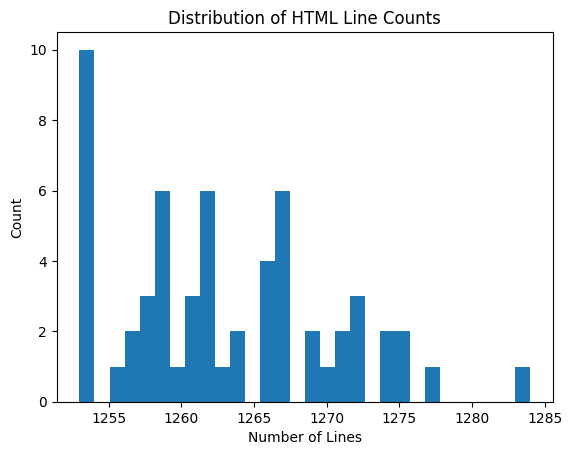

In [3]:
# Plot the distribution of line counts in the downloaded HTML files
# WRITE YOUR CODE HERE
import os
# Create a list to store the line counts
line_counts = []

# Loop through all the downloaded HTML files
for filename in os.listdir('raw_html'):
    if filename.endswith('.html'):
        # Open the file and count the number of lines
        with open(os.path.join('raw_html', filename), 'r') as f:
            html = f.readlines()
            line_count = len(html)
        
        # Append the line count to the list
        line_counts.append(line_count)

# Plot the histogram of line counts
plt.hist(line_counts, bins=30)
plt.xlabel('Number of Lines')
plt.ylabel('Count')
plt.title('Distribution of HTML Line Counts')

# Save the final plot in figures/html_line_count.png using the code below
plt.savefig('figures/html_line_count.png')

## 2. Exploring the processed data

### Task 2.1
The first thing to check is if we have extracted information from all of the collected links or not. In this task, you need to compare the number of links that you have collected (in link_list.txt) to the number of parsed data dictionaries (in parsed_data.jsons) that you have created by parsing the downloaded HTML files.

In [4]:
# Compute the number of links in link_list.txt
# WRITE YOUR CODE HERE
n_collected_links = 0
with open('link_list.txt', 'r') as f:
    n_collected_links = sum(1 for line in f)

# Compute the number of the parsed data dictionaries in parsed_data.jsons
# WRITE YOUR CODE HERE
n_parsed_links = 0
with open('parsed_data.jsons', 'r') as f:
    n_parsed_links = sum(1 for line in f)

print(f"Number of collected links: {n_collected_links}")
print(f"Number of parsed links: {n_parsed_links}")

Number of collected links: 61
Number of parsed links: 7


### Task 2.2
In this task, you need to plot the distribution of line counts in the text content that you extracted from the HTML web pages. This will help point out some errors in content extraction, if any.

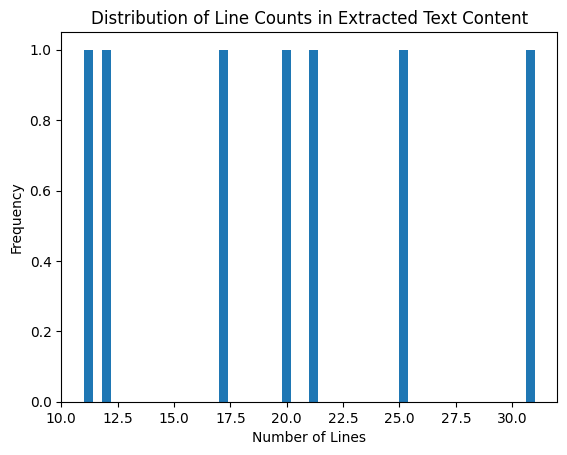

In [5]:
# Plot the distribution of line counts in the extracted text content
# WRITE YOUR CODE HERE
import json
# Read the parsed_data.jsons file
with open('parsed_data.jsons', 'r') as f:
     data = [json.loads(line) for line in f]

# Extract the line count for each page
line_counts = [len(d['content'].split('\n')) for d in data if 'content' in d]


# Create a histogram of the line counts
plt.hist(line_counts, bins=50)

# Add title and labels to the plot
plt.title('Distribution of Line Counts in Extracted Text Content')
plt.xlabel('Number of Lines')
plt.ylabel('Frequency')


# Save the final plot in figures/content_line_count.png using the code below
plt.savefig('figures/content_line_count.png')

### Task 2.3
In this task, you need to plot the distribution of the dates of the collected news articles.

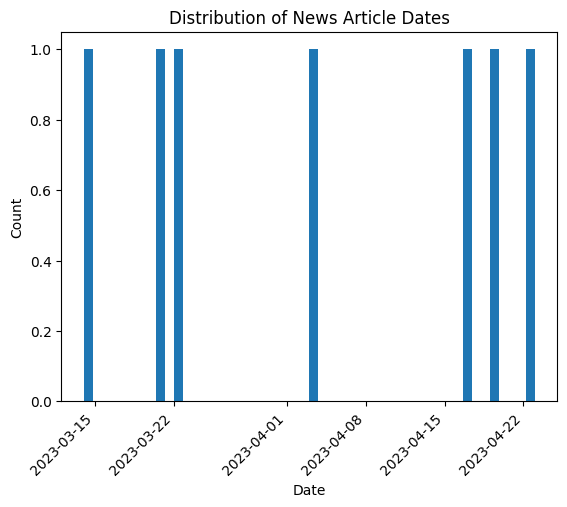

In [6]:
# Plot the distribution of dates from the extracted date information
# WRITE YOUR CODE HERE

import json
import datetime

# Read the parsed_data.jsons file
with open('parsed_data.jsons', 'r') as f:
    data = [json.loads(line) for line in f]

# Extract the date information and convert to datetime objects
dates = []
for d in data:
    if 'date' in d:
        dates.append(datetime.datetime.strptime(d['date'], "%d/%m/%Y"))

# Create a histogram of the dates
plt.hist(dates, bins=50)

# Rotate the x-axis labels and increase spacing between them
plt.xticks(rotation=45, ha='right')


# Add labels and title to the plot
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Distribution of News Article Dates')


# Save the final plot in figures/date_dist.png using the code below
plt.savefig('figures/date_dist.png')